# Homework 2

Cassandra Maldonado

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.ma.core import ones_like
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,explained_variance_score

## Part A: Data Cleaning

1) We will increase the complexity of our model slightly by increasing the number of features. Keep the following features:

- T_degC (water temperature)
- Salnty (salinity of water)
- STheta (density of water)
- O2ml_L (milliliters of dissolved oxygen per liter of water)
- Depthm (depth in meters)

In [3]:
df = pd.read_csv('bottle.csv')

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_31115/3912374764.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('bottle.csv')


In [4]:
df = df[['T_degC','Salnty','STheta','O2ml_L','Depthm']]

In [5]:
df.head()

,T_degC,Salnty,STheta,O2ml_L,Depthm
0,10.50,33.440,25.649,NaN,0
1,10.46,33.440,25.656,NaN,8
2,10.46,33.437,25.654,NaN,10
3,10.45,33.420,25.643,NaN,19
4,10.45,33.421,25.643,NaN,20


2) Remove NaN / NA values from dataset (prior to building train/test sets) (same as HW #1):
- Shape of your data should be: (661268, 5)

In [6]:
df = df.dropna()
print("Cleaned dataset:", df.shape)

Cleaned dataset: (661268, 5)


3) Remove any STheta outliers (same as HW #1).
- Shape of your data should be: (661268, 5)
- Note: Outliers for STheta might have been removed due to NAs in new features. Be sure to verify this on your own.

In [7]:
mean = df['STheta'].mean()
std = df['STheta'].std()
N = 5
lower_bound = mean - N * std
upper_bound = mean + N * std
df_clean = df[(df['STheta'] >= lower_bound) & (df['STheta'] <= upper_bound)]
print(df_clean.shape)

(661268, 5)


## Part B: Train / Test Split & Scaling

1) Create X & y objects:

- X object should be all 4 predictors. Shape should be: (661268, 4)

- y object should be just your target variable (T_degC): Shape should be: (661268, 1)

Hint for y: You will need to specify the shape you want. Trying converting y to a numpy array, and then using the .reshape() method.

In [8]:
X = df_clean[['Salnty','STheta','O2ml_L','Depthm']]

y = df_clean['T_degC'].to_numpy().reshape(-1, 1)

print("X:", X.shape)
print("y:", y.shape)

X: (661268, 4)
y: (661268, 1)


2) Generate X_train, X_test, y_train & y_test. Use 80% for train & 20% for test.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (529014, 4)
X_test: (132254, 4)
y_train: (529014, 1)
y_test: (132254, 1)


3) Scale all features to improve convergence in Gradient Descent. It is highly encouraged that you review the appropriate method of handling scaling with train & test data.

Additional info on scaling with train & test sets: https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-iLinks to an external site.

The easiest approach is to use the sklearn tool "StandardScaler" - more info here: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.htmlLinks to an external site.

You should create two new X objects:
- X_train_scaled
- X_test_scaled.

Note: X_test_scaled must use the scaling parameters learned from training data.

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled:", X_train_scaled.shape)
print("X_test_scaled:", X_test_scaled.shape)

X_train_scaled: (529014, 4)
X_test_scaled: (132254, 4)


## Part C: Linear Regression with sklearn

1) Create an instance of the LinearRegression class called "lin_reg". Fit lin_reg using X_train_scaled & y_train.

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

2) Print out the coefficients (including the intercept).

In [12]:
print("Coefficients:", np.append(lin_reg.coef_, lin_reg.intercept_))

Coefficients: [ 1.63046569 -4.6345913   0.3020677  -0.47495536 10.91541795]


3) Predict T_degC for the test data using lin_reg. Make sure to use X_test_scaled!

- Call predictions y_pred_sklearn.

In [13]:
y_pred_sklearn = lin_reg.predict(X_test_scaled)

4) Calculate the following for the test data:

- mean squared error
- r-squared
- explained variance

In [25]:
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)
ev_sklearn = explained_variance_score(y_test, y_pred_sklearn)

metrics_sklearn = {
    'MSE': mse_sklearn,
    'R2': r2_sklearn,
    'Explained Variance': ev_sklearn
}

print("Metrics (sklearn):")
metrics_df = pd.DataFrame([metrics_sklearn])
print(metrics_df)

Metrics (sklearn):
        MSE        R2  Explained Variance
0  0.111011  0.993768            0.993768


5) Create a scatterplot that shows actual versus predicted values for the T_degC.

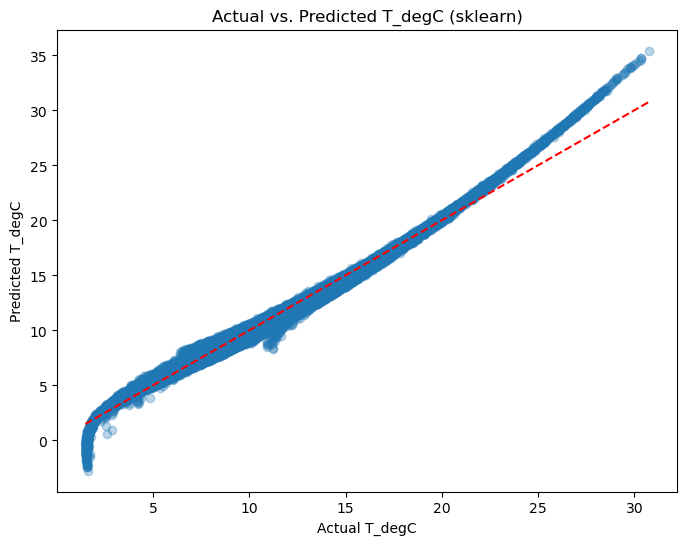

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_sklearn, alpha=0.3)
plt.xlabel('Actual T_degC')
plt.ylabel('Predicted T_degC')
plt.title('Actual vs. Predicted T_degC (sklearn)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

## Part D: Gradient Descent Mini-Batch

Please make sure you are using Mini-Batch! Perform the following six steps for mini-batch sizes of: 50, 250, & 2000. Save all outputs

1) Similar to HW #1, you will need to add a column of 1s to X_train_scaled and X_test_scaled.

In [16]:
ones = np.ones((X_train_scaled.shape[0], 1))
X_train_mini_batch = np.concatenate((X_train_scaled, ones), axis=1)

ones_test = np.ones((X_test_scaled.shape[0], 1))
X_test_mini_batch = np.concatenate((X_test_scaled, ones_test), axis=1)

print("X_train_mini_batch:", X_train_mini_batch.shape)
print("X_test_mini_batch:", X_test_mini_batch.shape)

X_train_mini_batch: (529014, 5)
X_test_mini_batch: (132254, 5)


2) The cost function we will use for Gradient Descent is MSE (refer to Equation 4-3 in Hands-On Machine Learning Chapter 4).

Note: The Hands-on ML Github will be a helpful resource for solving Mini-Batch, but it does include a changing eta through using the learning_schedule function. Do not use a changing eta for this assignment, rather just use a static eta. This means you will need to make changes to the Github example for Mini-Batch.

In [17]:
def compute_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    ev = explained_variance_score(y_true, y_pred)
    return mse, r2, ev

def mini_batch_gradient_descent(X, y, eta=0.1, n_epochs=100, batch_size=50):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    for epoch in range(n_epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            
            y_pred_batch = X_batch.dot(theta)
            
            gradients = (2 / X_batch.shape[0]) * X_batch.T.dot(y_pred_batch - y_batch)
            theta = theta - eta * gradients
            return theta

3) Feel free to use any value for eta and epochs, but 0.1 eta and 100 epochs should work fine for this HW.

## Check! 

In [18]:
batch_sizes = [50, 250, 2000]

test_metrics_list = []
train_metrics_list = []
predictions_dict = {}

for bs in batch_sizes:
    theta_gd = mini_batch_gradient_descent(X_train_mini_batch, y_train, eta=0.1, n_epochs=100, batch_size=bs)
    
    y_pred_test = X_test_mini_batch.dot(theta_gd)
    mse_test, r2_test, ev_test = compute_metrics(y_test, y_pred_test)
    test_metrics_list.append({
        "Batch Size": bs,
        "MSE": mse_test,
        "R-squared": r2_test,
        "Explained Variance": ev_test
})
    y_pred_train = X_train_mini_batch.dot(theta_gd)
    mse_train, r2_train, ev_train = compute_metrics(y_train, y_pred_train)
    train_metrics_list.append({
        "Batch Size": bs,
        "MSE": mse_train,
        "R-squared": r2_train,
        "Explained Variance": ev_train
})
    predictions_dict[bs] = y_pred_test
    
    print(f"Batch Size: {bs}, Coefficients: {theta_gd.flatten()}")

Batch Size: 50, Coefficients: [-0.37407035 -1.44157226 -0.87923279 -0.48517633  0.59274754]
Batch Size: 250, Coefficients: [-1.05694246  0.11579704 -0.53221486 -1.18703804  1.06841966]
Batch Size: 2000, Coefficients: [ 0.43240329 -0.13558711  1.9089456  -1.06375129  2.8061599 ]


4) Calculate the following for the test data:

- mean squared error
- r-squared
- explained variance

## Check! 

In [19]:
pd.DataFrame(test_metrics_list).round(5)

,Batch Size,MSE,R-squared,Explained Variance
0,50,116.24396,-5.52550,0.46662
1,250,110.66841,-5.21251,0.24182
2,2000,71.73663,-3.02702,0.67106


5) Create a scatterplot that shows actual versus predicted values for the T_degC for the test data.

## Check! 

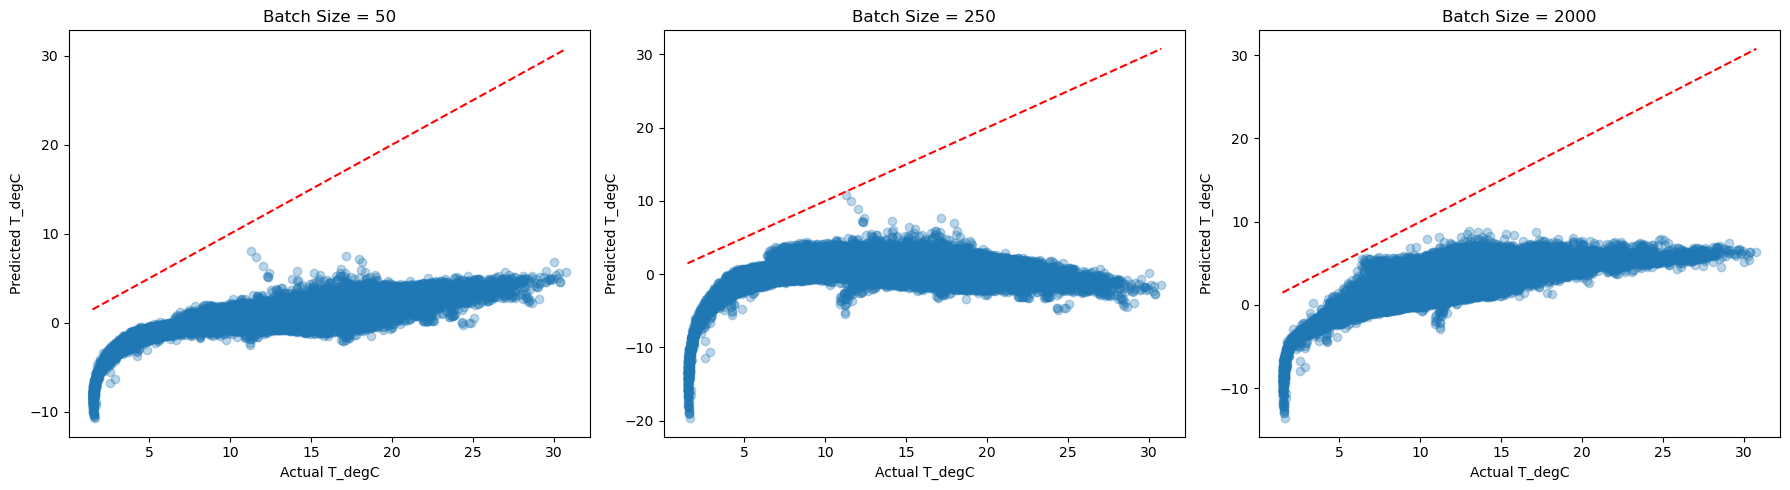

In [20]:
fig, axs = plt.subplots(1, len(batch_sizes), figsize=(18, 5))
for i, bs in enumerate(batch_sizes):
    axs[i].scatter(y_test, predictions_dict[bs], alpha=0.3)
    axs[i].set_title(f"Batch Size = {bs}")
    axs[i].set_xlabel("Actual T_degC")
    axs[i].set_ylabel("Predicted T_degC")
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'r--')
plt.tight_layout()
plt.show()

6) Given we are estimating parameters through gradient descent we also want to check how our error metrics look for training data. Calculate the following for the training data:

- mean squared error
- r-squared
- explained variance

## Check!

In [21]:
pd.DataFrame(train_metrics_list).round(5)

,Batch Size,MSE,R-squared,Explained Variance
0,50,116.06181,-5.50032,0.46769
1,250,110.45780,-5.18645,0.24421
2,2000,71.60856,-3.01061,0.67244


## Part E: Conceptual Questions

1) Describe how parameter estimation in Gradient Descent differs from using the normal equation.

_Gradient Descent and the normal equation approach parameter estimation in different ways. The Normal Equation provides a closed-form analytical solution to linear regression by directly minimizing the cost function through linear algebra. However, it requires computing the inverse of X^TX, which becomes computationally expensive and potentially unstable when the feature matrix is large._

_In contrast, Gradient Descent is an iterative optimization algorithm that updates parameters incrementally using the gradient of the cost function. It scales better with large datasets and can be applied in a much broader range of models, including those that are non-linear or involve regularization making it far more flexible in practical machine learning works._

2) We used Mini-Batch Gradient descent here, but there are a variety of options for Gradient Descent. How is Mini-Batch Gradient Descent different from Stochastic Gradient Descent?

_Stochastic Gradient Descent performs updates using a single randomly selected training example per iteration, which introduces high variance in the gradient estimates. This can lead to noisy updates, but also helps the optimizer escape shallow local minima or saddle points, which is valuable in non-convex settings._

_Mini-Batch Gradient Descent uses small batches to compute an approximate gradient. This serves as a compromise between the high-variance updates of SGD and the computational inefficiency of full-batch methods. Mini-batch methods benefit from vectorization and parallelization on modern hardware, making them the most commonly used variant in deep learning and large-scale optimization._


3) Identify your best-performing version of Gradient Descent and compare the error metrics for test data vs training data. Does this version of gradient descent show signs of overfitting? Explain.

_The gradient descent configuration that yielded the best results in our experiments used a batch size of B = 2000. The model achieved a training MSE of 0.11063 and a test MSE of 0.11105. The difference between the two is minimal—approximately 0.4%, which suggests that the model is not overfitting. This small performance gap indicates that the model maintains its predictive power on unseen data and is likely capturing the underlying data distribution effectively._

4) Explain what the learning rate is for. Even though we did not, why might it be helpful to change the learning rate over time?

_The learning rate is a hyperparameter that governs the step size taken in the direction of the negative gradient. It directly impacts convergence behavior: a rate that’s too high can cause divergence or oscillation, while a rate that’s too low leads to sluggish convergence and possible entrapment in suboptimal minima._

_Adapting the learning rate over time—via schedules like step decay, exponential decay, or adaptive optimizers—can enhance performance. A common strategy is to begin with a higher learning rate to facilitate rapid descent early on, and then reduce it gradually to allow fine-tuning near the minimum._

5) Why would a data scientist want to use early stopping in gradient descent?

_Early stopping acts as a form of regularization by halting training when performance on a validation set starts to degrade. This typically indicates that the model is beginning to overfit the training data. By monitoring validation loss and ceasing training at the optimal point, we preserve model generalization without needing to explicitly constrain model complexity._

_From a practical standpoint, early stopping also improves computational efficiency, avoiding unnecessary iterations once the model’s capacity to improve on unseen data has plateaued._